#FTSE100 data set

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
raw_cvs_data = pd.read_csv('FTSE100.csv')
df_ftse100=raw_cvs_data.copy()
df_ftse100.date = pd.to_datetime(df_ftse100.date, dayfirst = True)
df_ftse100.set_index("date", inplace=True)
df_ftse100=df_ftse100.asfreq('b')
data=df_ftse100.fillna(method='ffill')

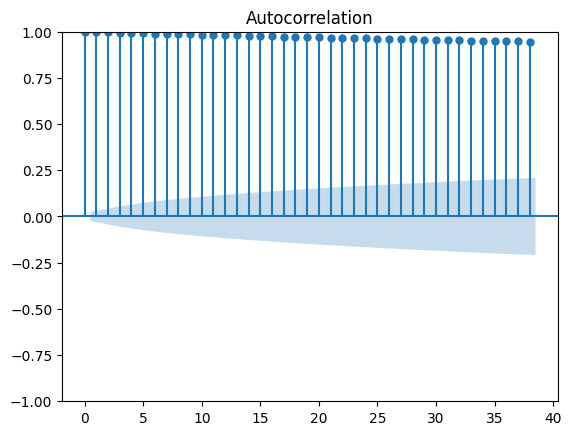

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)
plt.show()

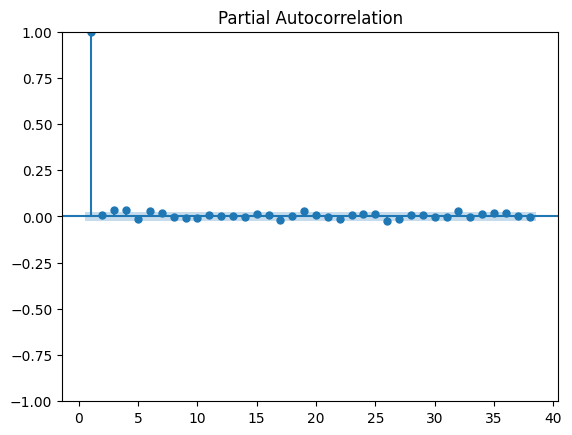

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data,zero=False)
plt.show()

#Applying models

In [ ]:
size = int(len(data)*0.8)
df, df_test = data.iloc[:size], data.iloc[size:]

In [ ]:
model = ARIMA(df,order =(1,2,40))

In [ ]:
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


KeyboardInterrupt: ignored

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
predictions = results.predict(start=len(df+1), end= len(df)+len(df_test)-1, dynamic=False)
#print(len(predictions))
#for i in range(len(predictions)):
#print('predicted=%f, expected=%f' % (predictions[i], df_test.ftse[i]))
rmse = sqrt(mean_squared_error(df_test.ftse, predictions))
print('Test RMSE: %.3f' % rmse)

In [ ]:
test=df_test

In [ ]:
test['prediction']=predictions

<ipython-input-19-9490a2583a1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction']=predictions


In [ ]:
test['difference']=test["ftse"]-test['prediction']
print(test)

                   ftse   prediction  difference
date                                            
2013-04-08  6276.940000  6264.119915   12.820085
2013-04-09  6313.200000  6267.521823   45.678177
2013-04-10  6387.370000  6274.375873  112.994127
2013-04-11  6416.140000  6278.812920  137.327080
2013-04-12  6384.390000  6287.317262   97.072738
...                 ...          ...         ...
2018-01-23  7731.827774  6998.550404  733.277370
2018-01-24  7643.428966  6999.190032  644.238934
2018-01-25  7615.839954  6999.688634  616.151320
2018-01-26  7665.541292  7000.328216  665.213076
2018-01-29  7671.533300  7000.826863  670.706437

[1256 rows x 3 columns]


<ipython-input-20-b4f71aa9568c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['difference']=test["ftse"]-test['prediction']


In [ ]:
df = pd.DataFrame({'Actual': test.ftse, 'Predicted': test.prediction})

<Axes: xlabel='date'>

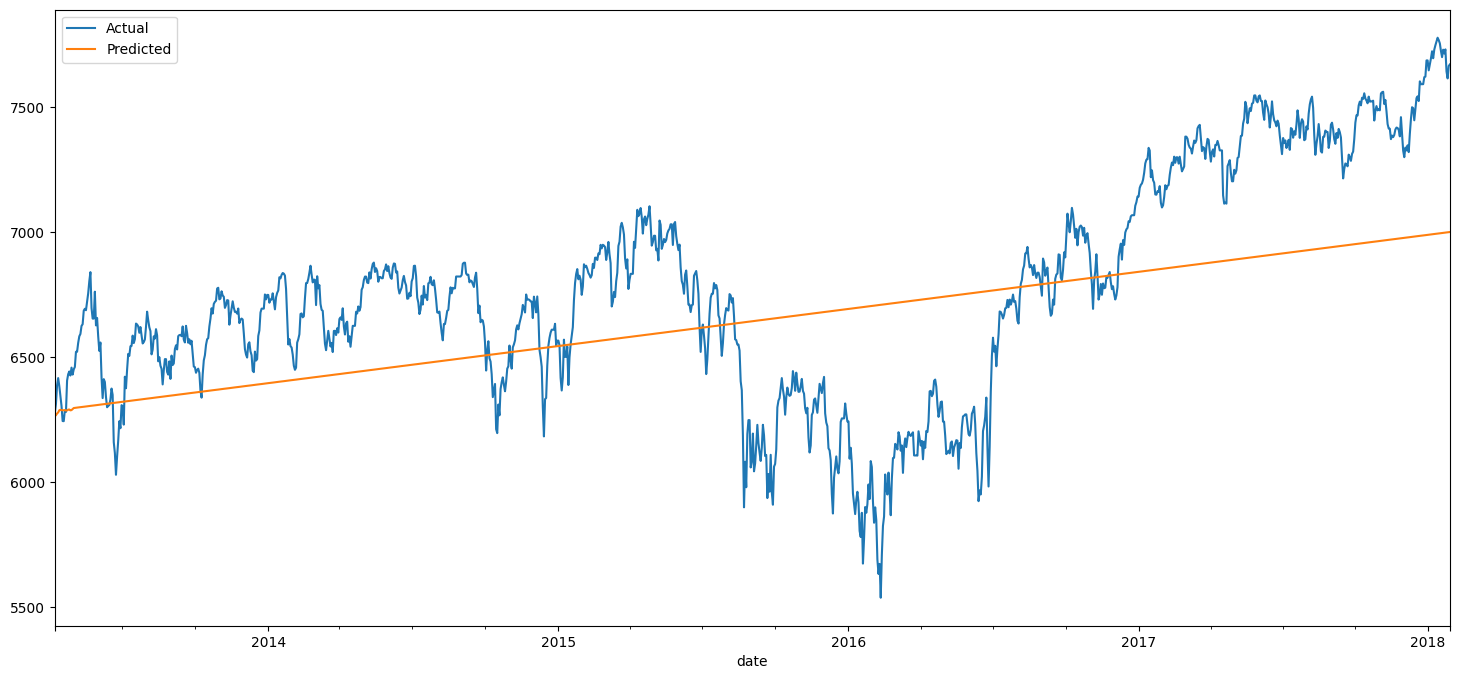

In [ ]:
df.plot(kind='line',figsize=(18,8))